# Inizializzazione

Caricare drive e leggere nomi foto


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import re
import shutil
import matplotlib.patches as patches
try:
  import pytesseract
except:
  !sudo apt install tesseract-ocr
  !pip install pytesseract
  import pytesseract
import random
try:
 from PIL import Image
except ImportError:
 import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,573 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
path_in = '/content/drive/My Drive/progetto/DDSM/'
cosa = ['train/', 'val/']
tipo = ['benign/', 'malignant/']

In [0]:
name = []   # it will contain all the path for the images
for c in cosa:
  path_c = path_in + c
  for ti in tipo:
    path_ti = path_c + ti
    for na in list(glob.iglob(os.path.join(path_ti,'*.jpg'))):
      name.append(na)

example_index = [15,16,17,18,19,20,33,509,515,530,536,600,634,643,649]

In [0]:
# try to select some important images
for i in example_index:
  print(i)
  img = cv2.imread(name[i])
  fig,ax = plt.subplots(1)
  ax.imshow(img)
  plt.show()

# parole 

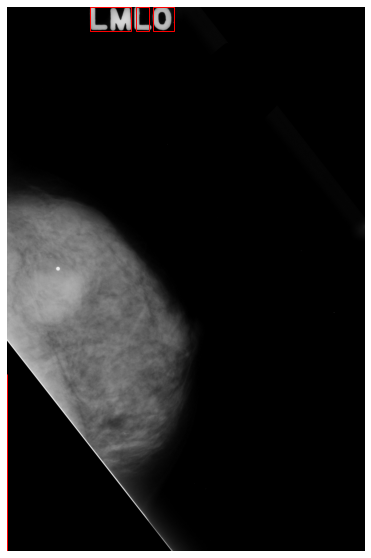

In [0]:
# Esempio con testo dritto e ruotato
img = cv2.imread(name[example_index[0]])#'/content/drive/My Drive/Advance/progetto/relazione/ezechiele_normale.jpeg')
# rotate
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2),38, 1)
img = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
hImg, wImg,_ = img.shape
boxes = pytesseract.image_to_boxes(img)
fig,ax = plt.subplots(1, figsize = (10,10))
ax.imshow(img)
for b  in boxes.splitlines():
  #print(b)
  b = b.split(' ')
  x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
  rect = patches.Rectangle((x,hImg- y), w-x,y-h,linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
plt.axis('off')
  
plt.show()

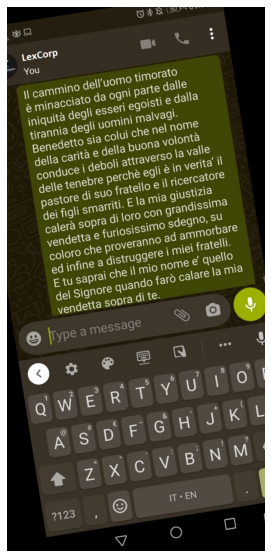

In [0]:
# visualizzare rotazioni
img = cv2.imread('/content/drive/My Drive/Advance/progetto/relazione/ezechiele_normale.jpeg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 9, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_rotation)

~ 0 1100 1262 4480 0


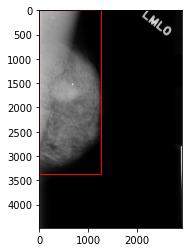

~ 0 1108 0 1645 0
~ 0 0 0 3028 0


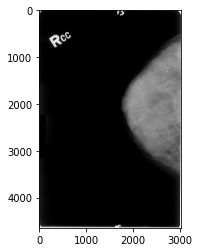

In [0]:
for i in example_index:  
  img = cv2.imread(name[i])
  # rotate
  # 
  hImg, wImg,_ = img.shape
  boxes = pytesseract.image_to_boxes(img)
  fig,ax = plt.subplots(1)
  ax.imshow(img)
  for b  in boxes.splitlines():
    print(b)
    b = b.split(' ')
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    rect = patches.Rectangle((x,hImg- y), w-x,y-h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
  plt.show()

## prima versione filtro


In [0]:
for i in example_index:
  img1 = cv2.imread(name[i])
  img = img1
  img = cv2.blur(img,(600,600))
  img2 =img
  img = img*(img>50)
  mask = cv2.bitwise_not((img-1)*(img==0))
  titles = ['Original Image', 'After blur', 'Mask', 'Filtered']
  images = [img1, img2, mask, cv2.bitwise_and(img1, mask)]

  for i in range(4):
      plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
      plt.title(titles[i])
      plt.xticks([]),plt.yticks([])
  
  plt.show()

KeyboardInterrupt: ignored

# Versione Filtro (alternativa)



In [0]:
for i in example_index:
  #for i in range(50,60):
  img1 = cv2.imread(name[i])
  img = img1
  #laplacian = cv2.Laplacian(img1,cv2.CV_64F)
  img = cv2.blur(img,(800,800))
  #img = cv2.Laplacian(img,cv2.CV_64F)
  img2 = img
  #img = (img*(img<200))
  ret,mask = cv2.threshold(img,190,255,cv2.THRESH_BINARY)
  mask1 = mask
  mask = cv2.blur(mask,(400,400))
  mask2 = mask
  mask = (mask-1)*(mask==0)
  

  titles = ['Original Image', 'Mask', 'Filtered','img2','mask1','mask2']
  images = [img1, mask, cv2.bitwise_and(img1, mask), img2,mask1,mask2]

  for i in range(6):
      plt.subplot(1,6,i+1),plt.imshow(images[i],'gray')
      plt.title(titles[i])
      plt.xticks([]),plt.yticks([])
  plt.show()


### Create new folder with "prima versione filtro"

In [0]:
path_in = '/content/drive/My Drive/progetto/DDSM/'
path_out = '/content/drive/My Drive/progetto/DDSM_mask'
cosa = ['train/', 'val/']
tipo = ['benign/', 'malignant/']

In [0]:
for c in cosa:
  path_c = path_in + c
  for ti in tipo:
    path_ti = path_c + ti
    for name in list(glob.iglob(os.path.join(path_ti,'*.jpg'))):
      split = re.split('DDSM',name)[-1]
      print(path_out+split)
      img1 = cv2.imread(name)
      img = img1
      img = cv2.blur(img,(600,600))
      img = img*(img>50)
      mask = cv2.bitwise_not((img-1)*(img==0))
      out_img = cv2.bitwise_and(img1, mask)
      cv2.imwrite( path_out+split, out_img)
      

# Cluster

In [0]:
path_in = '/content/drive/My Drive/progetto/DDSM/'
path_out = '/content/drive/My Drive/progetto/DDSM_mask_rectangle'
cosa = ['train/', 'val/']
tipo = ['benign/', 'malignant/']

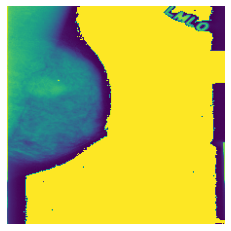

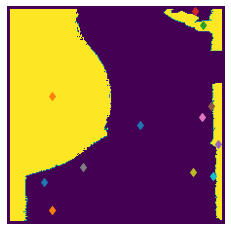

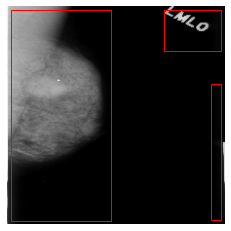

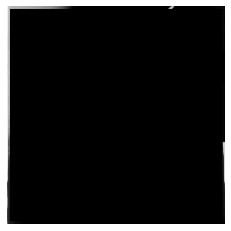

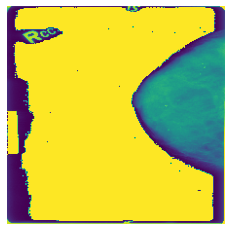

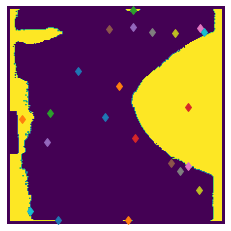

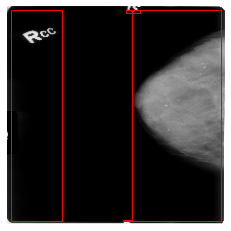

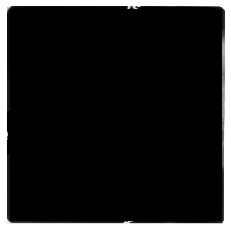

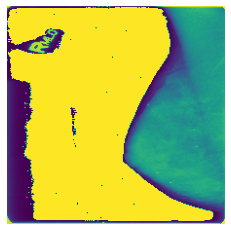

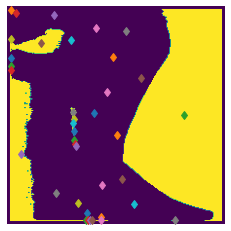

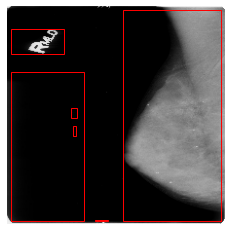

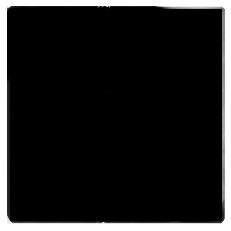

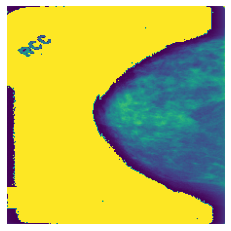

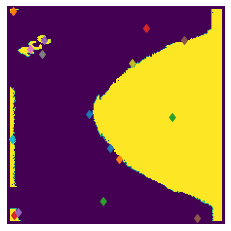

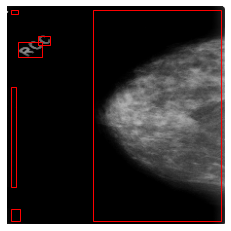

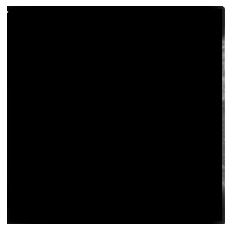

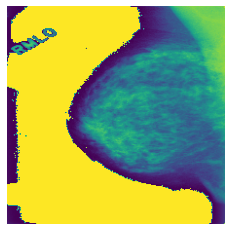

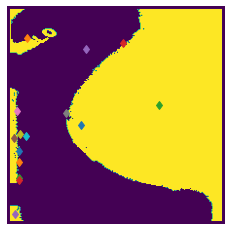

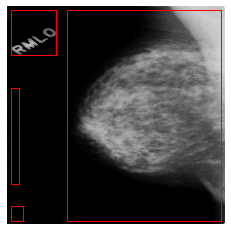

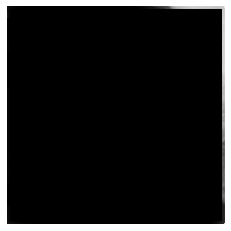

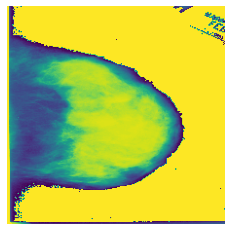

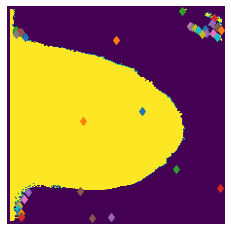

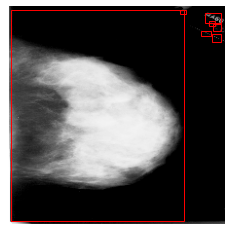

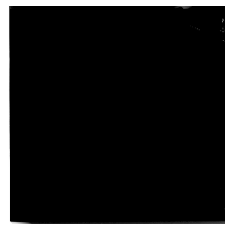

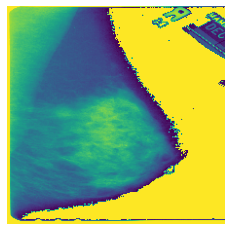

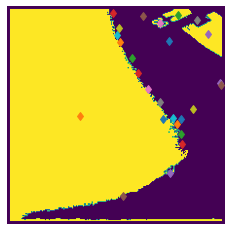

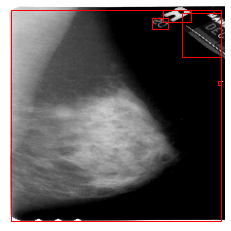

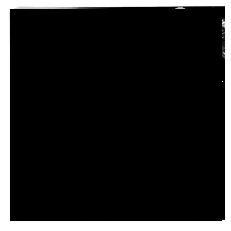

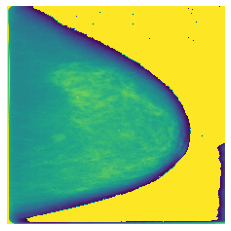

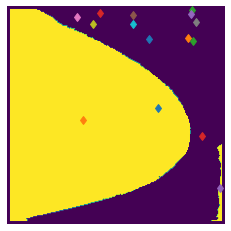

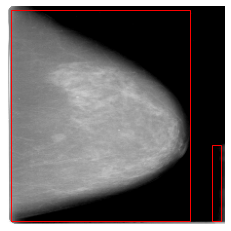

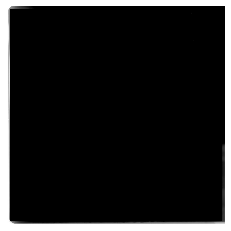

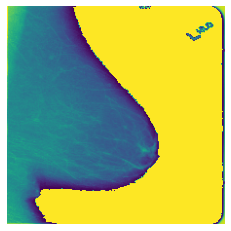

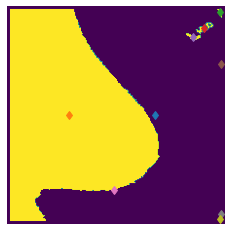

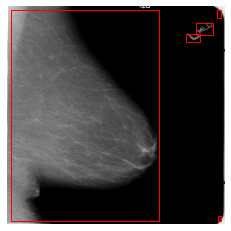

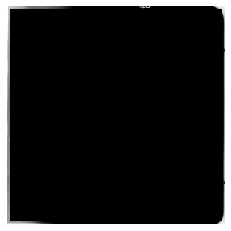

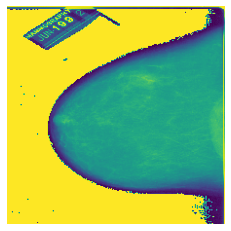

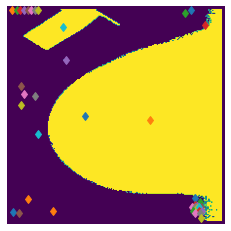

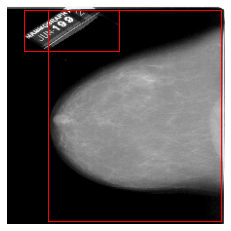

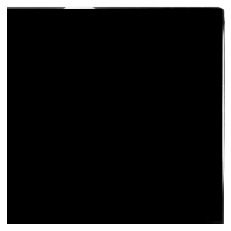

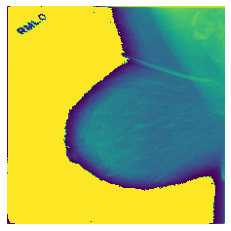

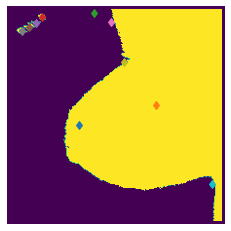

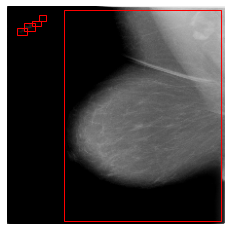

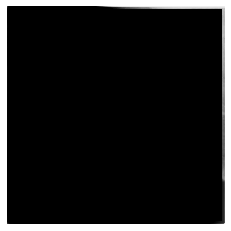

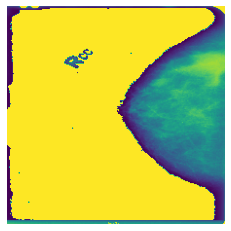

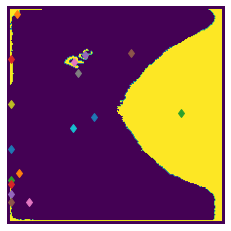

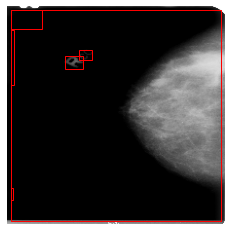

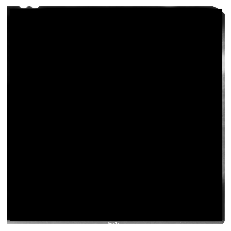

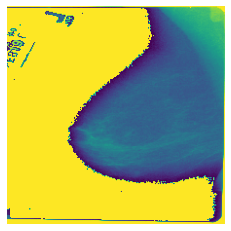

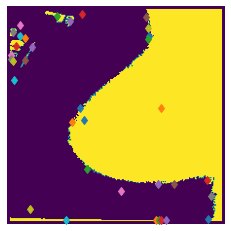

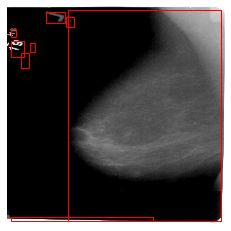

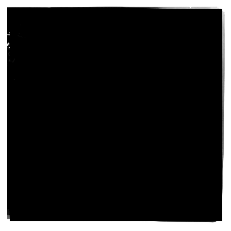

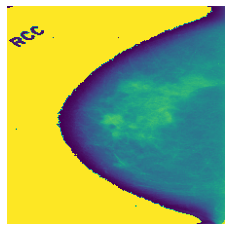

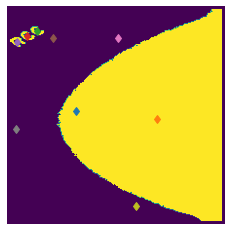

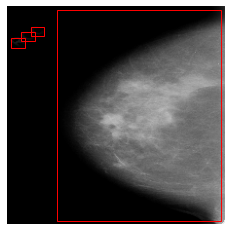

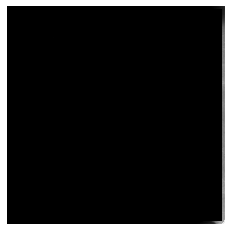

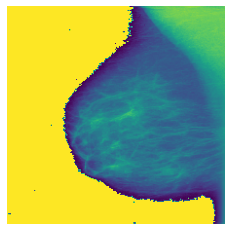

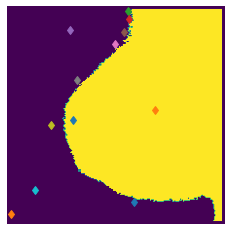

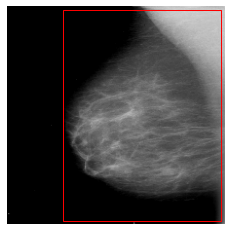

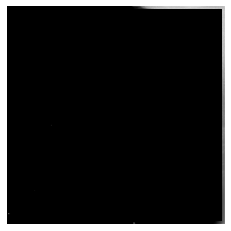

In [0]:
for i in example_index:
  image_buona = cv2.imread(name[i])
  image_buona = cv2.resize(image_buona,(224,224))
  img1 = cv2.imread(name[i],cv2.IMREAD_GRAYSCALE)
  img1  = cv2.resize(img1,(224,224))
  img = img1-1
  #
  fig,ax = plt.subplots(1)
  ax.imshow(img)
  plt.axis('off')
  plt.show()
  #
  img2 =img*(img == 255)
  
  ret, thresh = cv2.threshold(img2,0,255,cv2.THRESH_BINARY_INV)
  zero = np.zeros(224)
  for j in range(3):
    thresh[j] = zero
    thresh[223-j] = zero
    thresh[:,j] = zero
    thresh[:,223-j] = zero

  
  n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 40)
  
  fig,ax = plt.subplots(1)
  ax.imshow(thresh)
  [plt.plot(centroids[i][0],centroids[i][1], marker = 'd') for i in range(len(centroids)) ]
  plt.axis('off')
  plt.show()
  # print(n_labels)
  fig,ax = plt.subplots(1)
  ax.imshow(image_buona)
  size_thresh = 10
  mask = image_buona

  for i in range(1, n_labels):
      if stats[i, cv2.CC_STAT_AREA] >= size_thresh:
          x = stats[i, cv2.CC_STAT_LEFT]
          y = stats[i, cv2.CC_STAT_TOP]
          w = stats[i, cv2.CC_STAT_WIDTH]
          h = stats[i, cv2.CC_STAT_HEIGHT]
          if w<100 and h<100:
            mask[y:y+h,x:x+w] = 0
            rect = patches.Rectangle((x,y), w-1,h,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
          

  plt.axis('off')
  plt.show()
  fig,ax = plt.subplots(1)
  ax.imshow(mask)
  plt.axis('off')
  plt.show()


### Create new folder with this mask

In [0]:
for c in cosa:
  path_c = path_in + c
  for ti in tipo:
    path_ti = path_c + ti
    for name in list(glob.iglob(os.path.join(path_ti,'*.jpg'))):
      split = re.split('DDSM',name)[-1]
      print(path_out+split)
      image_buona = cv2.imread(name)
      image_buona = cv2.resize(image_buona,(224,224))
      img1 = cv2.imread(name,cv2.IMREAD_GRAYSCALE)
      img1  = cv2.resize(img1,(224,224))
      img = img1-1
      img2 =img*(img == 255)
      
      ret, thresh = cv2.threshold(img2,0,255,cv2.THRESH_BINARY_INV)
      zero = np.zeros(224)
      for j in range(3):
        thresh[j] = zero
        thresh[223-j] = zero
        thresh[:,j] = zero
        thresh[:,223-j] = zero


      n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 40)

      size_thresh = 10
      filtered = image_buona

      for i in range(1, n_labels):
          if stats[i, cv2.CC_STAT_AREA] >= size_thresh:
              x = stats[i, cv2.CC_STAT_LEFT]
              y = stats[i, cv2.CC_STAT_TOP]
              w = stats[i, cv2.CC_STAT_WIDTH]
              h = stats[i, cv2.CC_STAT_HEIGHT]
              if w<100 and h<100:
                filtered[y:y+h,x:x+w] = 0
                
              
      cv2.imwrite( path_out+split, filtered)
      